In [1]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


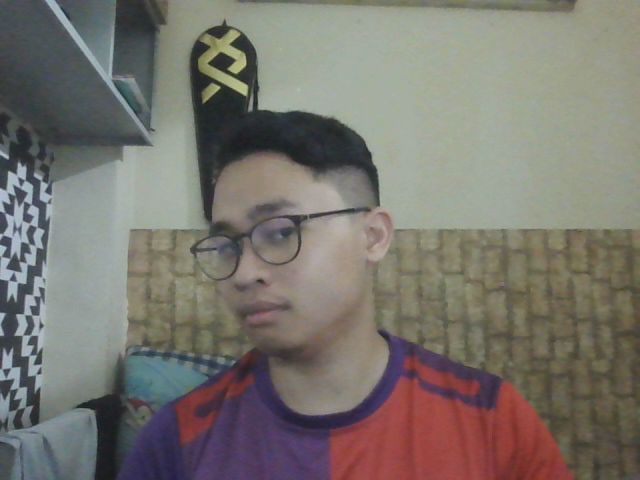

In [4]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [5]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
path = "/content/gdrive/MyDrive/Colab Notebooks/syiling/"

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
from PIL import Image 
from IPython.display import Image
%matplotlib inline

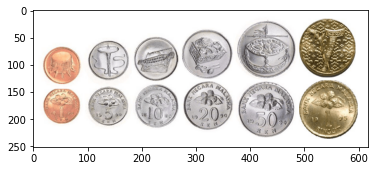

In [29]:
img = cv2.imread(path+"coins.png")
images = []
circle = []
  
# Notice the COLOR_BGR2RGB which means that the color is
# converted from BGR to RGB
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# using pillow
# pil_image = Image.fromarray(color_coverted)
# pil_image.show()

# using matplotlib
# plt.figure(figsize=(10,10))
plt.imshow(color_coverted)
plt.show()

In [30]:
  #grayscale
gryimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
color_covert = cv2.cvtColor(gryimg, cv2.COLOR_BGR2RGB)

  #blur
blurimg = cv2.medianBlur(gryimg, 9)

  #edge detection
canny = cv2.Canny(blurimg,100,250)

  #dilation
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(canny, kernel, iterations=1)

  #hough transform
rows = dilation.shape[0]
circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
  #print(type(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img, (i[0],i[1]), 1, (0, 100, 100), 3)
    cv2.circle(img, (i[0],i[1]), i[2], (255, 0, 255), 3)
    circle.append(i)



Total available circle is 13


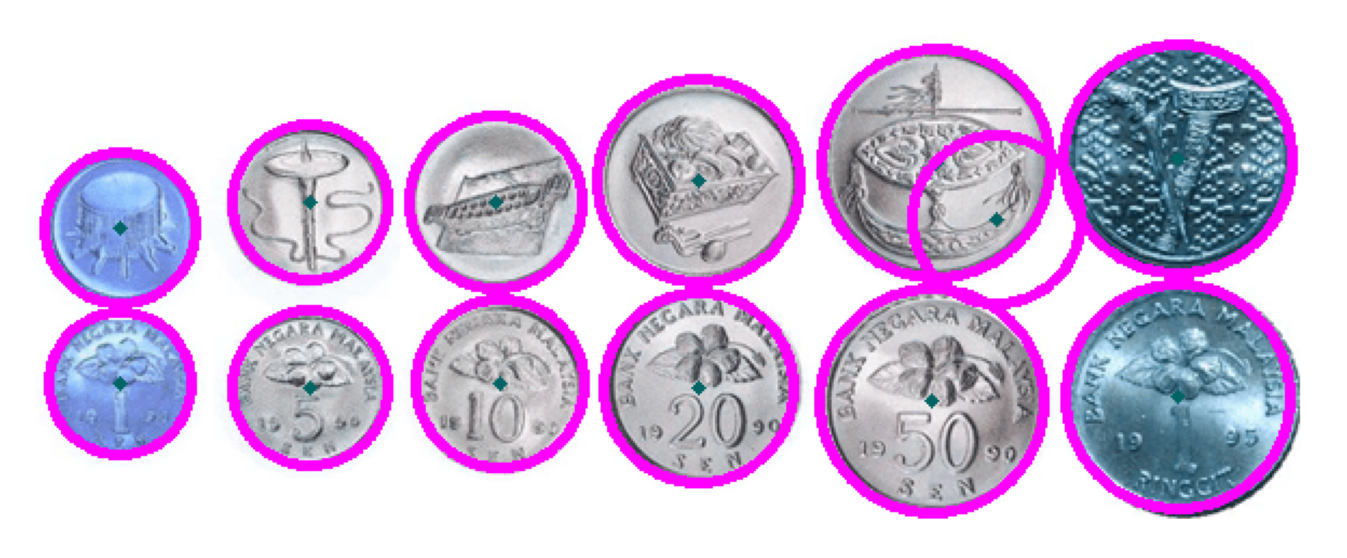

In [31]:
print('Total available circle is', len(circle)) 
plt.figure(figsize=[30,10])

#num_cols = len(images)
#num_rows = math.ceil(len(images) / num_cols)

#for i in range(0, len(images)):
    #plt.subplot(num_rows, num_cols, i+1) 
plt.axis('off')
plt.imshow(img)

In [ ]:
#mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/MyDrive/Colab Notebooks/syiling/"

import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import glob
from PIL import Image 
from IPython.display import Image
%matplotlib inline

img = cv2.imread(path+"coins.png")
images = []
circle = []
  
# Notice the COLOR_BGR2RGB which means that the color is
# converted from BGR to RGB
color_coverted = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  
# using pillow
# pil_image = Image.fromarray(color_coverted)
# pil_image.show()

# using matplotlib
# plt.figure(figsize=(10,10))
plt.imshow(color_coverted)
plt.show()

  #grayscale
gryimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
color_covert = cv2.cvtColor(gryimg, cv2.COLOR_BGR2RGB)

  #blur
blurimg = cv2.medianBlur(gryimg, 9)

  #edge detection
canny = cv2.Canny(blurimg,100,250)

  #dilation
kernel = np.ones((1,1),np.uint8)
dilation = cv2.dilate(canny, kernel, iterations=1)

  #hough transform
rows = dilation.shape[0]
circles = cv2.HoughCircles(dilation, cv2.HOUGH_GRADIENT, 1, rows / 8,
                               param1=100, param2=30,
                               minRadius=0, maxRadius=0)
circles = np.uint16(np.around(circles))
  #print(type(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(img, (i[0],i[1]), 1, (0, 100, 100), 3)
    cv2.circle(img, (i[0],i[1]), i[2], (255, 0, 255), 3)
    circle.append(i)

print('Total available circle is', len(circle)) 
plt.figure(figsize=[30,10]) 
plt.axis('off')
plt.imshow(img)